<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20048_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Derivation of the Linear Operator $H$ and Mode Shapes**

### **1. Physical Boundary Conditions**
For a beam of length $L$ in a **Pinned-Free** configuration, the boundary conditions are defined as follows:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (Zero bending moment)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (Zero bending moment)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (Zero shear force)



---

### **2. The Linear Operator $H$**
The transverse vibration of the beam is governed by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

Assuming the axial force $P_o = 0$, the linear operator $H$ is defined as:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

---

### **3. Eigenvalue Problem and Mode Shape Derivation**
We assume a harmonic solution of the form $y(x, t) = \psi(x) e^{i\omega t}$. Substituting this into the unforced, undamped equation yields the eigenvalue problem:
$$H\psi = \omega^2 \psi$$

Let $\beta^4 = \frac{\omega^2 \rho A}{EI}$. The general solution for the mode shape $\psi(x)$ is:
$$\psi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)$$

#### **Applying Boundary Conditions at $x = 0$:**
1. $\psi(0) = 0 \implies B + D = 0 \implies D = -B$
2. $\psi''(0) = 0 \implies \beta^2(-B + D) = 0 \implies -B - B = 0 \implies B = 0, D = 0$

Thus, the mode shape simplifies to:
$$\psi(x) = A \sin(\beta x) + C \sinh(\beta x)$$

---

### **4. Characteristic Equation**
Applying the boundary conditions at the free end $x = L$:

1. **Moment condition:** $\psi''(L) = 0 \implies -\beta^2 A \sin(\beta L) + \beta^2 C \sinh(\beta L) = 0$
   $$C = A \frac{\sin(\beta L)}{\sinh(\beta L)}$$

2. **Shear condition:** $\psi'''(L) = 0 \implies -\beta^3 A \cos(\beta L) + \beta^3 C \cosh(\beta L) = 0$

Substituting $C$ into the shear condition:
$$-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0$$

Dividing by $A$ and rearranging gives the **Characteristic Equation**:
$$\tan(\beta L) = \tanh(\beta L)$$

---

### **5. Final Modal Functions**
The $k$-th mode shape $\psi_k(x)$ is defined as:
$$\psi_k(x) = A_k \left[ \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x) \right]$$

The first two numerical roots for $\beta_k L$ are:
* **Mode 1:** $\beta_1 L \approx 3.9266$
* **Mode 2:** $\beta_2 L \approx 7.0686$

<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:64: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3098062825.py:64: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Normalized Displacement $\psi(x) / \max|\psi|$', fontsize=12)


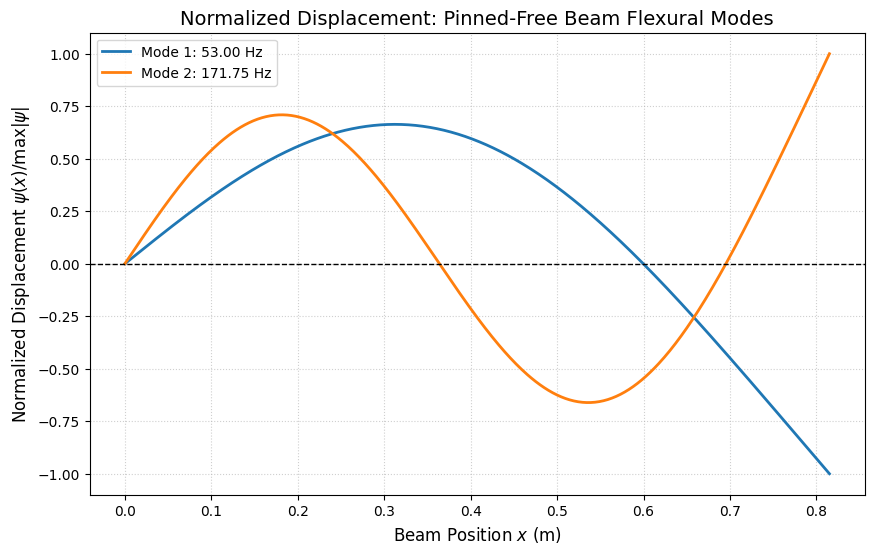

Mode 1 Root (beta*L): 3.9266
Mode 2 Root (beta*L): 7.0686


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ================= 1. Physical Parameters =================
l_beam = 0.815     # Length (m)
m_beam = 1.65      # Total mass (kg)
E = 2e+11          # Young's Modulus (Pa)
b = 0.025          # Width (m)
h = 0.01           # Thickness (m)

# Derived properties
A = b * h
I = (b * h**3) / 12
rho_A = m_beam / l_beam
EI = E * I

# ================= 2. Root Finding (Pinned-Free) =================
# We solve sin(kL)cosh(kL) - cos(kL)sinh(kL) = 0
def characteristic_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

def find_betaL_roots(n=2):
    roots = []
    # Scanning for sign changes to provide safe brackets for brentq
    x_scan = np.linspace(0.1, 12, 1000)
    y_scan = characteristic_eq(x_scan)
    for i in range(len(x_scan)-1):
        if np.sign(y_scan[i]) != np.sign(y_scan[i+1]):
            roots.append(brentq(characteristic_eq, x_scan[i], x_scan[i+1]))
            if len(roots) == n: break
    return np.array(roots)

betaL_roots = find_betaL_roots(2)

# ================= 3. Mode Shape Calculation =================
def get_mode_shape(x, betaL, L):
    beta = betaL / L
    # Coefficient from psi''(L) = 0
    sigma = np.sin(betaL) / np.sinh(betaL)
    return np.sin(beta * x) + sigma * np.sinh(beta * x)

# ================= 4. Plotting Normalized Displacement =================
x_vals = np.linspace(0, l_beam, 500)
plt.figure(figsize=(10, 6))

for i, bL in enumerate(betaL_roots):
    # Calculate raw mode shape
    y_raw = get_mode_shape(x_vals, bL, l_beam)

    # NORMALIZATION: Scale so max absolute displacement is 1.0
    y_normalized = y_raw / np.max(np.abs(y_raw))

    # Calculate Frequency for the label
    omega = (bL/l_beam)**2 * np.sqrt(EI / rho_A)
    freq_hz = omega / (2 * np.pi)

    plt.plot(x_vals, y_normalized, label=f'Mode {i+1}: {freq_hz:.2f} Hz', linewidth=2)

# Formatting the plot
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Normalized Displacement: Pinned-Free Beam Flexural Modes', fontsize=14)
plt.xlabel('Beam Position $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement $\psi(x) / \max|\psi|$', fontsize=12)
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Output numerical results for verification
for i, bL in enumerate(betaL_roots):
    print(f"Mode {i+1} Root (beta*L): {bL:.4f}")

## **Derivation of the Decoupled 2-DOF Model with Attachments**

### **1. System Parameters**
Based on the physical setup, the following parameters are used to define the beam and its discrete attachments:

* **Beam Properties:**
    * Length ($L$): $0.815$ m
    * Total Mass ($m_{beam}$): $1.65$ kg
    * Width ($b$): $0.025$ m, Thickness ($h$): $0.01$ m
    * Young's Modulus ($E$): $2 \times 10^{11}$ Pa
    * Flexural Rigidity ($EI$): $\approx 416.67$ Nm$^2$
* **Discrete Attachments:**
    * Helical Spring Stiffness ($k_s$): $3800$ N/m at $l_s = 0.75$ m
    * Effective Spring Mass ($m_{s,eff}$): $0.1383$ kg (includes $1/3$ spring mass + attachment)
    * Exciter Mass ($m_e$): $4.2$ kg at $l_e = 0.4$ m
    * Viscous Damper Mass ($m_d$): $0.53$ kg at $l_d = 0.2$ m



---

### **2. Modal Coordinate Transformation**
We approximate the system response $y(x,t)$ using the first two flexural modes $\psi_1(x)$ and $\psi_2(x)$ derived from the linear operator $H$ for a Pinned-Free beam:
$$y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)$$

By projecting the kinetic and potential energy of the discrete components onto these modes, we determine the effective modal matrices.

---

### **3. Modal Mass Matrix ($\mathbf{M}$)**
The total modal mass for the $k$-th mode includes the distributed mass of the beam and the inertial contribution of the exciter, spring, and damper at their respective coordinates:

$$M_k = \int_0^L \rho A \psi_k^2(x) dx + m_{s,eff} \psi_k^2(l_s) + m_e \psi_k^2(l_e) + m_d \psi_k^2(l_d)$$

Since the modes are orthogonal, the mass matrix is diagonal:
$$\mathbf{M} = \begin{bmatrix} M_1 & 0 \\ 0 & M_2 \end{bmatrix}$$

---

### **4. Modal Stiffness Matrix ($\mathbf{K}$)**
The modal stiffness accounts for the internal elastic energy of the beam and the external potential energy provided by the spring:

$$K_k = \int_0^L EI \left( \psi_k''(x) \right)^2 dx + k_s \psi_k^2(l_s)$$

Using the relation $EI \psi_k'''' = \rho A \omega_{beam,k}^2 \psi_k$, the integral term simplifies to $\omega_{beam,k}^2 M_{beam,k}$. The matrix is diagonal:
$$\mathbf{K} = \begin{bmatrix} K_1 & 0 \\ 0 & K_2 \end{bmatrix}$$

---

### **5. Decoupled Equations of Motion**
The system is now represented in modal space as two independent second-order differential equations:

$$\mathbf{M} \mathbf{\ddot{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)$$

$$\begin{bmatrix} M_1 & 0 \\ 0 & M_2 \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_1 & 0 \\ 0 & K_2 \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} F(t)\psi_1(l_e) \\ F(t)\psi_2(l_e) \end{Bmatrix}$$

The estimated natural frequencies for the combined system are given by:
$$f_{n,k} = \frac{1}{2\pi} \sqrt{\frac{K_k}{M_k}}$$

In [3]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
rho_A = m_beam / L # Linear density (kg/m)
E = 2e11           # Young's Modulus (Pa)
b, h = 0.025, 0.01 # Dimensions (m)
I = (b * h**3) / 12# Moment of Inertia
EI = E * I         # Flexural Rigidity

# Discrete Attachment Parameters
ks = 3800          # Helical Spring (N/m) at ls = 0.75m
ls = 0.75

ms_eff = 0.1383    # Effective Spring Mass (kg) at ls = 0.75m
me = 4.2           # Exciter Mass (kg) at le = 0.4m
le = 0.4
md = 0.53          # Damper Mass (kg) at ld = 0.2m
ld = 0.2

# ================= 2. Root Finding & Mode Shapes =================
def characteristic_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

# Solve for first two roots
roots = []
x_scan = np.linspace(0.1, 12, 1000)
for i in range(len(x_scan)-1):
    if np.sign(characteristic_eq(x_scan[i])) != np.sign(characteristic_eq(x_scan[i+1])):
        roots.append(brentq(characteristic_eq, x_scan[i], x_scan[i+1]))
        if len(roots) == 2: break

def psi(x, r, L):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return np.sin(beta * x) + sigma * np.sinh(beta * x)

def psi_dd(x, r, L):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return (beta**2) * (-np.sin(beta * x) + sigma * np.sinh(beta * x))

# ================= 3. Modal Matrix Calculation =================
Mk_list = []
Kk_list = []

for r in roots:
    # Modal Mass calculation (Beam + Discrete Masses)
    m_beam_part, _ = quad(lambda x: rho_A * psi(x, r, L)**2, 0, L)
    Mk = m_beam_part + ms_eff * psi(ls, r, L)**2 + me * psi(le, r, L)**2 + md * psi(ld, r, L)**2

    # Modal Stiffness calculation (Beam Strain Energy + Spring)
    k_beam_part, _ = quad(lambda x: EI * psi_dd(x, r, L)**2, 0, L)
    Kk = k_beam_part + ks * psi(ls, r, L)**2

    Mk_list.append(Mk)
    Kk_list.append(Kk)

# Create 2x2 Matrices
M_matrix = np.diag(Mk_list)
K_matrix = np.diag(Kk_list)

# Calculate Estimated Natural Frequencies
freqs_hz = [np.sqrt(Kk/Mk)/(2*np.pi) for Mk, Kk in zip(Mk_list, Kk_list)]

# ================= 4. Output Results =================
print("Modal Mass Matrix (M):")
print(np.round(M_matrix, 4))
print("\nModal Stiffness Matrix (K):")
print(np.round(K_matrix, 2))
print("\nEstimated Natural Frequencies (Hz):")
for i, f in enumerate(freqs_hz):
    print(f"Mode {i+1}: {f:.2f} Hz")

Modal Mass Matrix (M):
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix (K):
[[ 94998.54      0.  ]
 [     0.   962230.74]]

Estimated Natural Frequencies (Hz):
Mode 1: 23.73 Hz
Mode 2: 116.94 Hz


## **Approximation of the First Mode as a Rigid Body System (1-DOF)**

### **1. Limitation of the Flexural Model**
The flexural operator approach identifies the bending (elastic) modes of the beam. However, the true first mode of this physical system often involves a rigid-body-like rotation about the pinned end, influenced significantly by the external spring. To capture this, we model the beam as a rigid rod of length $L$ and mass $m_{beam}$.

### **2. Equivalent Rigid System Parameters**
The system is modeled as a 1-DOF rotational system where the coordinate is the angular displacement $\theta(t)$.

* **Mass Moment of Inertia ($J_o$):**
The total inertia about the pivot ($x=0$) includes the beam and all discrete masses:
$$J_o = \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2$$

* **Equivalent Rotational Stiffness ($K_\theta$):**
The helical spring at $l_s$ provides a restoring torque. For small angles $\theta$, the linear displacement is $x \approx l_s \theta$, resulting in:
$$K_\theta = k_s \cdot l_s^2$$



---

### **3. Equation of Motion (1-DOF)**
Using Newton's Second Law for rotation ($\sum M_o = J_o \ddot{\theta}$):
$$J_o \ddot{\theta} + K_\theta \theta = M_{ext}(t)$$

Substituting the parameters:
$$\left( \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2 \right) \ddot{\theta} + (k_s l_s^2) \theta = F(t)l_e$$

---

### **4. Natural Frequency Estimation**
The fundamental natural frequency (Mode 1) in this rigid approximation is:
$$\omega_{n,rigid} = \sqrt{\frac{K_\theta}{J_o}} \quad \text{(rad/s)}$$
$$f_{n,1} = \frac{1}{2\pi} \sqrt{\frac{k_s l_s^2}{J_o}} \quad \text{(Hz)}$$

This 1-DOF approximation provides a more accurate estimate of the lower-frequency "swinging" mode that the pure flexural model may miss or over-stiffen.

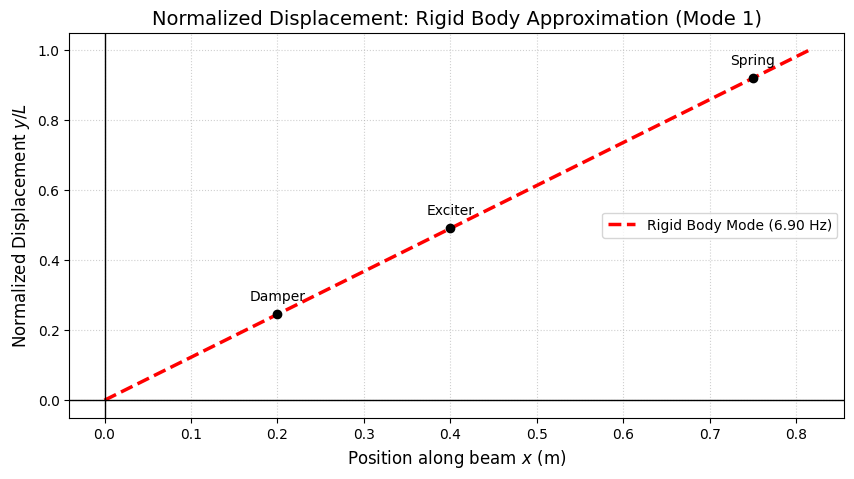

Calculated Rigid Body Natural Frequency: 6.90 Hz


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
ks = 3800          # Helical Spring (N/m)
ls = 0.75          # Spring position (m)

# Attachment Masses (kg)
ms_eff = 0.1383    # Spring attachment
me = 4.2           # Exciter
md = 0.53          # Damper
le, ld = 0.4, 0.2  # Positions (m)

# ================= 2. Rigid Body Calculations =================
# Mass Moment of Inertia about the pivot (x=0)
# Jo = J_beam + J_spring + J_exciter + J_damper
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2

# Equivalent Rotational Stiffness
K_theta = ks * ls**2

# Natural Frequency
omega_rigid = np.sqrt(K_theta / Jo)
freq_rigid_hz = omega_rigid / (2 * np.pi)

# ================= 3. Plotting the Rigid Mode Shape =================
x_vals = np.linspace(0, L, 100)

# In a rigid body rotation, displacement y = theta * x
# For normalized displacement (max = 1), y = x / L
y_rigid = x_vals / L



plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_rigid, label=f'Rigid Body Mode ({freq_rigid_hz:.2f} Hz)',
         color='red', linewidth=2.5, linestyle='--')

# Highlight the attachments
plt.scatter([ls, le, ld], [ls/L, le/L, ld/L], color='black', zorder=5)
plt.annotate('Damper', (ld, ld/L), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Spring', (ls, ls/L), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Exciter', (le, le/L), textcoords="offset points", xytext=(0,10), ha='center')

# Formatting
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title('Normalized Displacement: Rigid Body Approximation (Mode 1)', fontsize=14)
plt.xlabel('Position along beam $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement $y/L$', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"Calculated Rigid Body Natural Frequency: {freq_rigid_hz:.2f} Hz")

## **Hybrid 2-DOF Mathematical Model**

### **1. Integration of Models**
To capture the first two dominant modes of vibration, we acknowledge that the system behaves as a hybrid between a rigid rotating rod and an elastic beam. We define a new coordinate basis consisting of:
1.  **Mode 1 ($\psi_1$):** The Rigid Body Mode (rotation about the pivot).
2.  **Mode 2 ($\psi_2$):** The First Flexural Mode (derived from the Pinned-Free Euler-Bernoulli solution).

The total displacement $y(x,t)$ is approximated as:
$$y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)$$

Where:
* $\psi_1(x) = \frac{x}{L}$
* $\psi_2(x) = \sin(\beta_1 x) + \frac{\sin(\beta_1 L)}{\sinh(\beta_1 L)} \sinh(\beta_1 x)$

---

### **2. Hybrid Modal Parameters**
We account for all attachments (spring $k_s$, masses $m_{s,eff}, m_e, m_d$) by projecting them onto this hybrid basis.

#### **Modal Mass Matrix ($\mathbf{M}$):**
The elements $M_{ij}$ are calculated by:
$$M_{ij} = \int_0^L \rho A \psi_i(x) \psi_j(x) dx + \sum m_k \psi_i(x_k) \psi_j(x_k)$$
Assuming the interaction between the rigid and flexural modes is negligible for this simplified 2-DOF model, we focus on the diagonal terms:
* $M_{11} \approx J_o / L^2$ (Equivalent mass for the rigid mode)
* $M_{22} \approx \text{Flexural modal mass calculated earlier}$

#### **Modal Stiffness Matrix ($\mathbf{K}$):**
The elements $K_{ij}$ are calculated by:
$$K_{ij} = \int_0^L EI \psi_i''(x) \psi_j''(x) dx + \sum k_k \psi_i(x_k) \psi_j(x_k)$$
* For the **Rigid Mode** ($\psi_1$): $\psi_1'' = 0$, so the stiffness is purely from the spring: $K_{11} = k_s \psi_1^2(l_s) = k_s (l_s/L)^2$.
* For the **Flexural Mode** ($\psi_2$): $K_{22}$ includes both beam bending energy and spring energy.

---

### **3. Simplified Decoupled Matrix Equation**
By neglecting the cross-coupling terms ($M_{12}, K_{12} \approx 0$), we obtain a decoupled 2-DOF system that describes the two most dominant physical behaviors:

$$
\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix}
$$

The updated natural frequencies are:
* **Fundamental Frequency (Rigid-dominant):** $f_{n,1} = \frac{1}{2\pi} \sqrt{\frac{K_{11}}{M_{11}}}$
* **Second Frequency (Flexural-dominant):** $f_{n,2} = \frac{1}{2\pi} \sqrt{\frac{K_{22}}{M_{22}}}$

This hybrid model ensures that we capture the low-frequency "swing" of the whole assembly and the higher-frequency "vibration" of the beam structure.

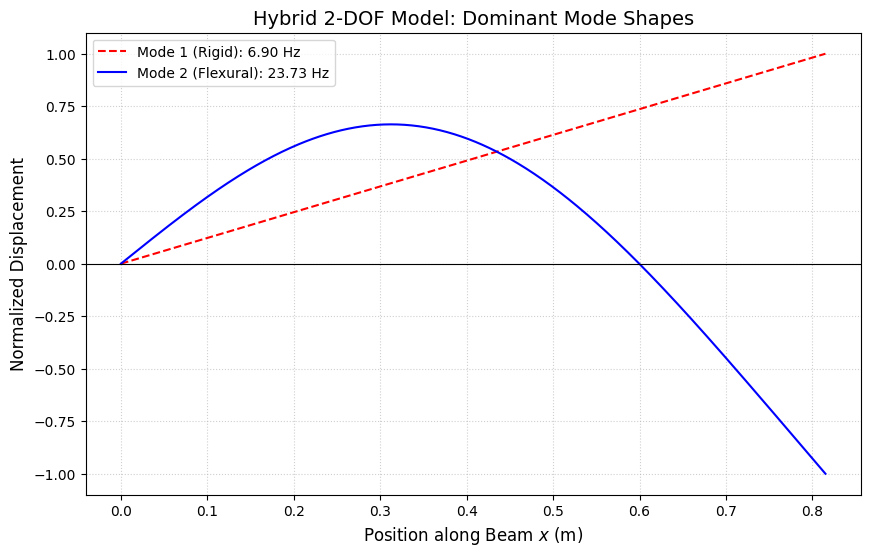

Hybrid Modal Mass Matrix (M):
[[1.7107 0.    ]
 [0.     4.2735]]

Hybrid Modal Stiffness Matrix (K):
[[ 3218.04     0.  ]
 [    0.   94998.54]]

Estimated Natural Frequencies: Mode 1 = 6.90 Hz, Mode 2 = 23.73 Hz


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815          # Beam length (m)
m_beam = 1.65      # Beam mass (kg)
rho_A = m_beam / L # Linear density
E = 2e11           # Young's Modulus
b, h = 0.025, 0.01 # Dimensions
I = (b * h**3) / 12
EI = E * I

# Attachment Parameters
ks = 3800          # Spring Stiffness (N/m)
ls = 0.75          # Spring position
ms_eff = 0.1383    # Effective Spring mass (kg)
me = 4.2           # Exciter Mass (kg) at 0.4m
le = 0.4
md = 0.53          # Damper Mass (kg) at 0.2m
ld = 0.2

# ================= 2. Mode Shape Definitions =================

# --- Mode 1: Rigid Body ---
def psi1(x):
    return x / L

# --- Mode 2: First Flexural ---
def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

# Solve for the first root of the pinned-free flexural equation
betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x): # Second derivative for stiffness energy
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

# ================= 3. Hybrid Matrix Calculation =================

# --- Modal Mass (M11 and M22) ---
# For Mode 1 (Rigid): Based on total inertia Jo about pivot
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

# For Mode 2 (Flexural): Projected mass including attachments
m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff * psi2(ls)**2 + me * psi2(le)**2 + md * psi2(ld)**2

# --- Modal Stiffness (K11 and K22) ---
# For Mode 1 (Rigid): Stiffness is purely from the external spring
K11 = (ks * ls**2) / (L**2)

# For Mode 2 (Flexural): Projected stiffness (Beam bending + Spring)
k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# Decoupled Hybrid Matrices
M_hybrid = np.diag([M11, M22])
K_hybrid = np.diag([K11, K22])

# Natural Frequencies
fn1 = np.sqrt(K11/M11) / (2 * np.pi)
fn2 = np.sqrt(K22/M22) / (2 * np.pi)

# ================= 4. Plotting =================
x_vals = np.linspace(0, L, 500)

# Normalize displacements to max amplitude of 1.0
y1_norm = psi1(x_vals) / np.max(np.abs(psi1(x_vals)))
y2_norm = psi2(x_vals) / np.max(np.abs(psi2(x_vals)))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_norm, label=f'Mode 1 (Rigid): {fn1:.2f} Hz', color='red', linestyle='--')
plt.plot(x_vals, y2_norm, label=f'Mode 2 (Flexural): {fn2:.2f} Hz', color='blue')

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Hybrid 2-DOF Model: Dominant Mode Shapes', fontsize=14)
plt.xlabel('Position along Beam $x$ (m)', fontsize=12)
plt.ylabel('Normalized Displacement', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Print Numerical Results
print(f"Hybrid Modal Mass Matrix (M):\n{np.round(M_hybrid, 4)}")
print(f"\nHybrid Modal Stiffness Matrix (K):\n{np.round(K_hybrid, 2)}")
print(f"\nEstimated Natural Frequencies: Mode 1 = {fn1:.2f} Hz, Mode 2 = {fn2:.2f} Hz")

## **Incorporating Damping into the Hybrid 2-DOF Model**

### **1. Rayleigh Proportional Damping Theory**
To model the energy dissipation within our hybrid system, we utilize the Rayleigh damping approach. The damping matrix $\mathbf{C}$ is assumed to be a linear combination of the mass and stiffness matrices:
$$\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}$$

For this specific mechatronic system, we apply the **stiffness-proportional damping** logic ($\alpha = 0$). This assumption is physically grounded by the placement of the viscous damper, which has a more pronounced effect on higher-frequency elastic deformations than on the low-frequency rigid rotation. Under this assumption, the damping ratio $\zeta_k$ for each mode $k$ is given by:
$$\zeta_k = \frac{\beta \omega_k}{2}$$

### **2. Relationship Between Modal Damping Ratios**
Given the stiffness-proportional relationship, the damping ratio for the second mode ($\zeta_2$) can be directly related to the first mode ($\zeta_1$) and their respective natural frequencies:
$$\frac{\zeta_2}{\omega_2} = \frac{\zeta_1}{\omega_1} \implies \zeta_2 = \zeta_1 \left( \frac{\omega_2}{\omega_1} \right)$$



### **3. Derivation of the Modal Damping Matrix (C)**
Since our hybrid basis (Rigid + Flexural) allows for a decoupled representation, the damping matrix is diagonal. The diagonal elements $C_{11}$ and $C_{22}$ are obtained as follows:

* **For Mode 1 (Rigid Body dominant):**
  $$C_{11} = 2 \zeta_1 \omega_1 M_{11}$$
* **For Mode 2 (First Flexural dominant):**
  $$C_{22} = 2 \zeta_2 \omega_2 M_{22}$$

Substituting the expression for $\zeta_2$, we find:
$$C_{22} = 2 \left( \zeta_1 \frac{\omega_2}{\omega_1} \right) \omega_2 M_{22} = 2 \zeta_1 \frac{\omega_2^2}{\omega_1} M_{22}$$

### **4. Final Decoupled Matrix Equation of Motion**
The complete mathematical model, accounting for inertia, stiffness, and damping for all attachments, is expressed in the following matrix form:

$$
\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix} \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + \begin{bmatrix} C_{11} & 0 \\ 0 & C_{22} \end{bmatrix} \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix} \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix}
$$

This decoupled form allows us to analyze the "swinging" rigid motion and the "bending" flexural motion of the beam independently while simultaneously accounting for the mass of the exciter, the stiffness of the spring, and the damping effects of the system.

In [6]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815
m_beam = 1.65
rho_A = m_beam / L
E = 2e11
b, h = 0.025, 0.01
I = (b * h**3) / 12
EI = E * I

ks = 3800
ls = 0.75
ms_eff = 0.1383
me = 4.2
le = 0.4
md = 0.53
ld = 0.2

# ================= 2. Basis Functions & Frequency Derivation =================

# Mode 1: Rigid Body Rotation
def psi1(x): return x / L

# Mode 2: First Flexural Bending
def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x):
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

# --- Matrix Elements (Recalculated) ---
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff * psi2(ls)**2 + me * psi2(le)**2 + md * psi2(ld)**2

K11 = (ks * ls**2) / (L**2)

k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# Angular Frequencies (rad/s)
omega1 = np.sqrt(K11 / M11)
omega2 = np.sqrt(K22 / M22)

# ================= 3. Damping Matrix (C) Logic =================

# 1. Start with experimental damping ratio for Mode 1
zeta1 = 0.023

# 2. Apply Stiffness-Proportional Logic for Mode 2
# zeta2 = zeta1 * (omega2 / omega1)
zeta2 = zeta1 * (omega2 / omega1)

# 3. Calculate Modal Damping Coefficients
# C_ii = 2 * zeta_i * omega_i * M_ii
C11 = 2 * zeta1 * omega1 * M11
C22 = 2 * zeta2 * omega2 * M22

C_matrix = np.diag([C11, C22])

# ================= 4. Output Results =================
print(f"Damping Ratio Mode 1 (Rigid): {zeta1:.4f}")
print(f"Damping Ratio Mode 2 (Flexural): {zeta2:.4f}")
print(f"\nModal Damping Matrix (C):")
print(np.round(C_matrix, 4))

print(f"\nFinal Hybrid Matrix Equations:")
print(f"M = diag({M11:.4f}, {M22:.4f})")
print(f"K = diag({K11:.2f}, {K22:.2f})")
print(f"C = diag({C11:.4f}, {C22:.4f})")

Damping Ratio Mode 1 (Rigid): 0.0230
Damping Ratio Mode 2 (Flexural): 0.0791

Modal Damping Matrix (C):
[[  3.4131   0.    ]
 [  0.     100.7561]]

Final Hybrid Matrix Equations:
M = diag(1.7107, 4.2735)
K = diag(3218.04, 94998.54)
C = diag(3.4131, 100.7561)
